In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from numpy.fft import fft, ifft, ifftshift, fftshift
import seaborn as sns

In [3]:
# Check numerically the Fourier pair Laplacian/bilateral exponential <-> Lorentzian/cauchy
# Grids in real and Fourier space - They are linked by the Nyquist relation Dx*Dxi = 2*pi/N
N = 2048  # grid size
Dx = 0.01  # grid step in real space
Lx = N * Dx  # upper truncation limit in real space
Dxi = 2 * np.pi / Lx  # grid step in Fourier space
Lxi = N * Dxi  # upper truncation limit in Fourier space
x = Dx * np.arange(-N/2, N/2)  # grid in real space
xi = Dxi * np.arange(-N/2, N/2)  # grid in Fourier space

# Analytical expressions
a = 1
fa = a/2 * np.exp(-a * np.abs(x))  # Laplace (or double exponential)
Fa = a**2 / (a**2 + xi**2)  # Lorentzian (or Cauchy)

# Numerical calculations
Fn = fftshift(ifft(ifftshift(fa))) * Lx
fn = fftshift(fft(ifftshift(Fa))) / Lx
Fn1 = fftshift(fft(ifftshift(fa))) * Dxi
fn1 = fftshift(ifft(ifftshift(Fa))) / Dxi

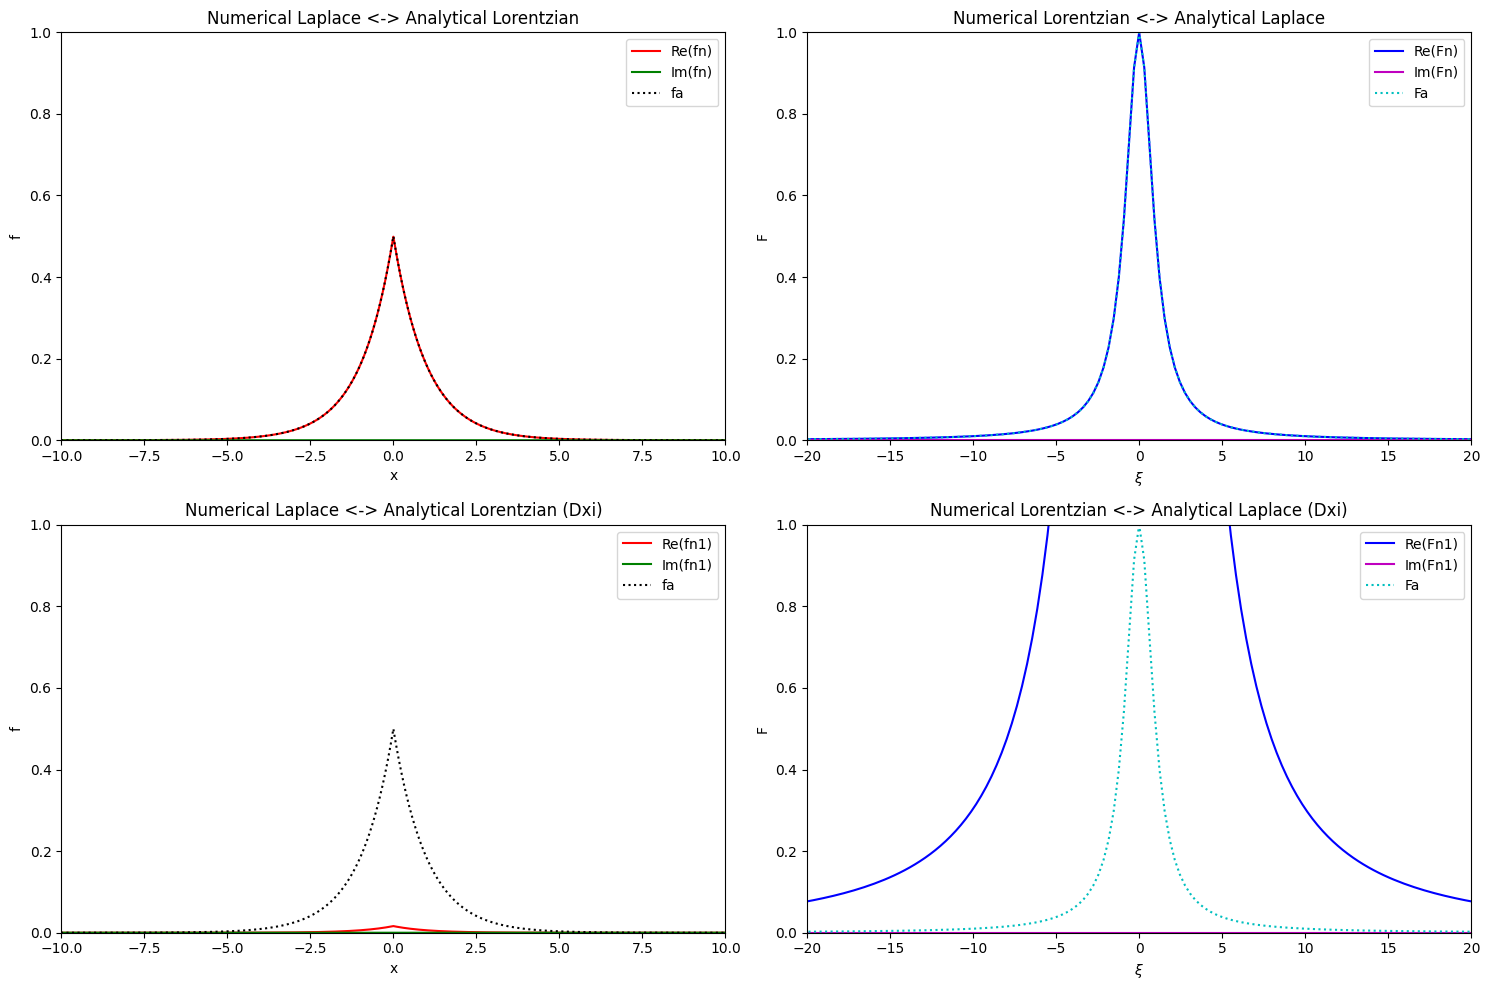

In [4]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(x, np.real(fn), 'r', label='Re(fn)')
plt.plot(x, np.imag(fn), 'g', label='Im(fn)')
plt.plot(x, fa, 'k:', label='fa')
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(-10,10)
plt.ylim(0,1)
plt.legend()
plt.title('Numerical Laplace <-> Analytical Lorentzian')

plt.subplot(222)
plt.plot(xi, np.real(Fn), 'b', label='Re(Fn)')
plt.plot(xi, np.imag(Fn), 'm', label='Im(Fn)')
plt.plot(xi, Fa, 'c:', label='Fa')
plt.xlabel(r'$\xi$')
plt.ylabel('F')
plt.xlim(-20,20)
plt.ylim(0,1)
plt.legend()
plt.title('Numerical Lorentzian <-> Analytical Laplace')

plt.subplot(223)
plt.plot(x, np.real(fn1), 'r', label='Re(fn1)')
plt.plot(x, np.imag(fn1), 'g', label='Im(fn1)')
plt.plot(x, fa, 'k:', label='fa')
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(-10,10)
plt.ylim(0,1)
plt.legend()
plt.title('Numerical Laplace <-> Analytical Lorentzian (Dxi)')

plt.subplot(224)
plt.plot(xi, np.real(Fn1), 'b', label='Re(Fn1)')
plt.plot(xi, np.imag(Fn1), 'm', label='Im(Fn1)')
plt.plot(xi, Fa, 'c:', label='Fa')
plt.xlabel(r'$\xi$')
plt.ylabel('F')
plt.xlim(-20,20)
plt.ylim(0,1)
plt.legend()
plt.title('Numerical Lorentzian <-> Analytical Laplace (Dxi)')

plt.tight_layout()

Text(0.5, 1.0, 'Laplace or double exponential function')

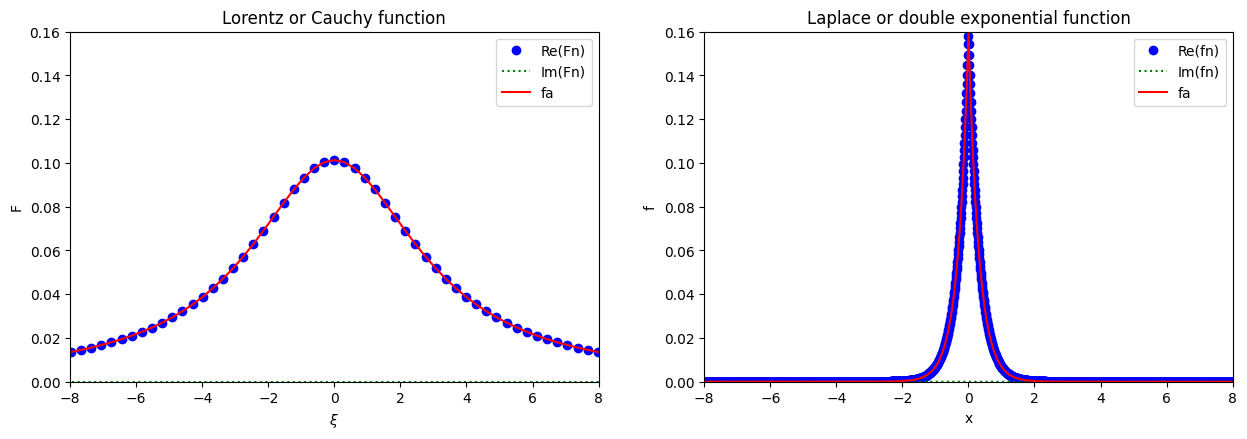

In [5]:
## Check numerically the Fourier pair Laplacian/bilateral exponential <-> Lorentzian/cauchy
## PULSE / Angluar Frequency 

# Grids in real and Fourier space, linked by the Nyquist relation
#  Dx*Dxi = 2*pi/N
N = 2048  # grid size
Dx = 0.01  # grid step in real space
Lx = N * Dx  # upper truncation limit in real space
Dxi = 2 * np.pi / Lx  # grid step in Fourier space
Lxi = N * Dxi  # upper truncation limit in Fourier space
x = Dx * np.arange(-N/2, N/2)  # grid in real space
xi = Dxi * np.arange(-N/2, N/2)  # grid in Fourier space

# Analytical expressions
fa = 1/(2*np.pi) * np.exp(-np.pi * np.abs(x))  # Laplace (or double exponential)
Fa = 1 / (np.pi**2 + xi**2)  # Lorentzian (or Cauchy)

# Numerical approvimation
Fn = fftshift(ifft(ifftshift(fa)))*Lx
fn = fftshift(fft(ifftshift(Fa)))/Lx

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(xi, np.real(Fn), 'ob', label='Re(Fn)')
plt.plot(xi, np.imag(Fn), ':g', label='Im(Fn)')
plt.plot(xi, Fa, 'r', label='fa')
plt.xlabel(r'$\xi$')
plt.ylabel('F')
plt.xlim(-8,8)
plt.ylim(0,0.16)
plt.legend()
plt.title('Lorentz or Cauchy function')

plt.subplot(222)
plt.plot(x, np.real(fn), 'ob', label='Re(fn)')
plt.plot(x, np.imag(fn), ':g', label='Im(fn)')
plt.plot(x, fa, 'r', label='fa')
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(-8,8)
plt.ylim(0,0.16)
plt.legend()
plt.title('Laplace or double exponential function')

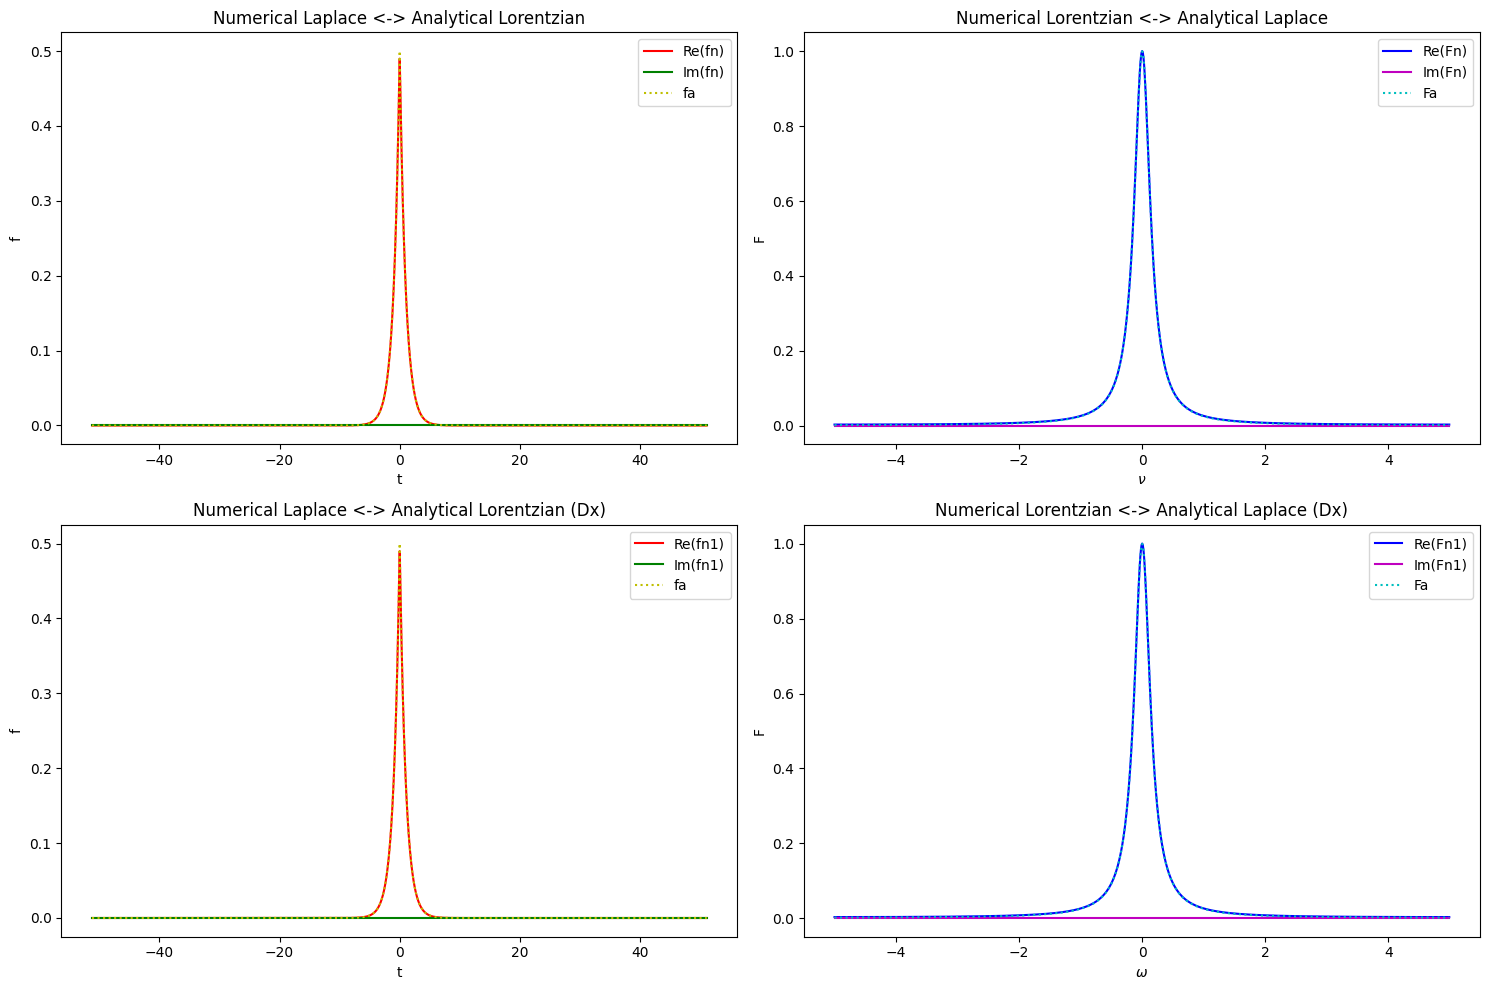

In [28]:
# Check numerically the Fourier pair Laplace <-> Lorentzian
# FREQUENCY SPACE
N = 1024 # grid size
Dx = 0.1 # grid step in real space
x = Dx * np.arange(-N/2, N/2) # grid in real space
Lx = N * Dx # upper truncation limit in real space

# Nyquist relation: Dx*Dnu = 1/N
Dnu = 1 / Lx
nu = Dnu * np.arange(-N/2, N/2)
Nu = N * Dnu  # = 1/Dt;

a = 1
fa = a/2 * np.exp(-a * np.abs(x))  # Laplace (or double-sided exponential)
Fa = a**2 / (a**2 + (2 * np.pi * nu)**2)  # Lorentzian (or Cauchy)

Fn = fftshift(ifft(ifftshift(fa))) * Lx
fn = fftshift(fft(ifftshift(Fa))) / Lx
Fn1 = fftshift(fft(ifftshift(fa))) * Dx
fn1 = fftshift(ifft(ifftshift(Fa))) / Dx

# Plotting
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(x, np.real(fn), 'r', label='Re(fn)')
plt.plot(x, np.imag(fn), 'g', label='Im(fn)')
plt.plot(x, fa, 'y:', label='fa')
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.title('Numerical Laplace <-> Analytical Lorentzian')

plt.subplot(222)
plt.plot(nu, np.real(Fn), 'b', label='Re(Fn)')
plt.plot(nu, np.imag(Fn), 'm', label='Im(Fn)')
plt.plot(nu, Fa, 'c:', label='Fa')
plt.xlabel(r'$\nu$')
plt.ylabel('F')
plt.legend()
plt.title('Numerical Lorentzian <-> Analytical Laplace')

plt.subplot(223)
plt.plot(x, np.real(fn1), 'r', label='Re(fn1)')
plt.plot(x, np.imag(fn1), 'g', label='Im(fn1)')
plt.plot(x, fa, 'y:', label='fa')
plt.xlabel('t')
plt.ylabel('f')
plt.legend()
plt.title('Numerical Laplace <-> Analytical Lorentzian (Dx)')

plt.subplot(224)
plt.plot(nu, np.real(Fn1), 'b', label='Re(Fn1)')
plt.plot(nu, np.imag(Fn1), 'm', label='Im(Fn1)')
plt.plot(nu, Fa, 'c:', label='Fa')
plt.xlabel(r'$\omega$')
plt.ylabel('F')
plt.legend()
plt.title('Numerical Lorentzian <-> Analytical Laplace (Dx)')

plt.tight_layout()
